<a href="https://colab.research.google.com/github/macgyver121/Project-Chart-to-Text-generation/blob/main/live_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install -q transformers datasets
!pip install -q pytorch-lightning wandb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,384 kB/s)
debconf: unable to initi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 15.6 MB/s eta 0

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import cv2
import pytesseract
import shutil
import os
import random
from PIL import Image

import re
import csv
import os

import pyarrow as pa
from datasets import DatasetDict
from datasets.arrow_dataset import Dataset
from transformers import AutoTokenizer, AutoModelWithLMHead, AutoModelForSeq2SeqLM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


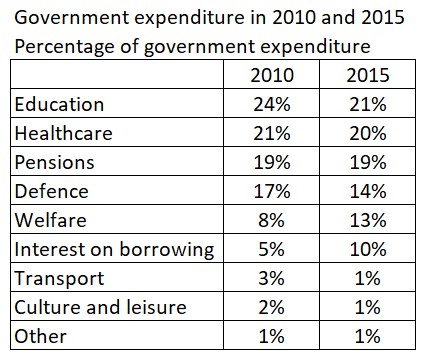

In [ ]:
src = '/content/drive/MyDrive/DADS7202_final/IELTS/table/'+str(140)+'.png'  ## change imagge here
from IPython.display import Image, display
display(Image(src))

In [ ]:
img = cv2.imread(src)
# Adding custom options
custom_config = r'--psm 1'
text = pytesseract.image_to_string(img, config=custom_config)
#print(text)
text_split = text.split('\n')
#print(text_split)
while '' in text_split:
    text_split.remove('')
while ' ' in text_split:
    text_split.remove(' ')
key = ' '.join(text_split[:-2])
print(key)

Government expenditure in 2010 and 2015 Percentage of government expenditure 2010 2015 Education 24% 21% Healthcare 21% 20% Pensions 19% 19% Defence 17% 14% Welfare 8% 13% Interest on borrowing 5% 10% Transport 3% 1% Culture and leisure 2% 1%


In [ ]:
print("Key :", key)
f = open('/content/drive/MyDrive/DADS7202_final/IELTS/captions/'+str(140)+'.txt', 'r')  ## change text here
content = f.read()
content = re.sub('\s+',' ',content)
text = content
print("Original text :", text)

Key : Government expenditure in 2010 and 2015 Percentage of government expenditure 2010 2015 Education 24% 21% Healthcare 21% 20% Pensions 19% 19% Defence 17% 14% Welfare 8% 13% Interest on borrowing 5% 10% Transport 3% 1% Culture and leisure 2% 1%
Original text : The above pie charts depict the government expenditure across nine sectors in 2010 and 2015. The variation in expenses over the five years. As we can observe, in both years, the government expenditure was the highest in the sectors of healthcare, education, defence and pensions, with education taking the highest proportion, 24% in 2010 and 21% in 2015, healthcare taking 22% in 2010 and 20% in 2015, defence taking 17% in 2010 and 14% in 2015 and pensions equal 19 in both the years. The small regions of expense were cultures, interests in borrowing, transport and leisure and “other expenses”. While the other expenses took 1% in 2010, while transport, culture and leisure and other expenses covered the minimum in 2015 that was 1%

In [ ]:
save_directory = "/content/drive/MyDrive/DADS7202_final/model-pim" ## edit model
model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained("gagan3012/k2t-base")  ## edit tokenizer
# prepare for the model
input_ids = tokenizer(key, return_tensors='pt').input_ids
# generate
outputs = model.generate(input_ids,min_length=150, max_length=200)
print("Generated from k2t-base:", tokenizer.decode(outputs[0], skip_special_tokens=True))

Generated from k2t-base: The unemployment rate in Asia Pacific was at approximately 5.5 percent in 2012. In Asia Pacific, the unemployment rate in Asia Pacific was at about 5.5 percent. The unemployment rate was at about 3.5 percent in Asia Pacific. The unemployment rate was at about 3.5 percent in Asia Pacific. The unemployment rate was at about 3.5 percent in Asia Pacific. The unemployment rate in Asia Pacific was at about 3.5 percent in 2012. The unemployment rate in Asia Pacifica was at about 3.5 percent. The unemployment rate in Asia Pacific Pacific was at about 3.5 percent in Asia Pacific in 2012. The unemployment rate was at about 3.5 percent in Asia Pacific in 2012. The unemployment rate was at about 


In [ ]:
save_directory = "/content/drive/MyDrive/DADS7202_final/model2-t5base-ielts-100e-r2" ## edit model
model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained("t5-base")  ## edit tokenizer
# prepare for the model
input_ids = tokenizer(key, return_tensors='pt').input_ids
# generate
outputs2 = model.generate(input_ids,min_length=150, max_length=200)
print("Generated from t5base :", tokenizer.decode(outputs2[0], skip_special_tokens=True))

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Generated from t5base : The unemployment rate in all Asia was higher than the previous year. The highest unemployment rate was seen in the Philippines, which had a rate of 5.5 in 2012 and 5.3 in 2014. The lowest unemployment rate was seen in Singapore, which had a rate of 1.4 in 2014. The lowest unemployment rate was seen in the Philippines, which had a rate of 5.5 in 2012. In 2013 the lowest unemployment rate was seen in the Philippines, with a rate of 5.8 in 2014. In 2014, the lowest unemployment rate was seen in the Philippines, with 5.5 in 2013. The lowest unemployment rate was seen in China, where the lowest was in Singapore, where the lowest was in Singapore, where the lowest was in China, where the lowest rate was 3.4 in 2013. In contrast, the lowest unemployment rate in Asia was seen in Singapore, where the lowest rate was in India, where the lowest was in China, where the lowest was in Singapore.


In [ ]:
save_directory = "gagan3012/k2t-base" ## edit model
model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained("gagan3012/k2t-base")  ## edit tokenizer
# prepare for the model
input_ids = tokenizer(key, return_tensors='pt').input_ids
# generate
outputs3 = model.generate(input_ids,min_length=150, max_length=200)
print("Generated from k2t-base(non-train):", tokenizer.decode(outputs3[0], skip_special_tokens=True))

Generated from k2t-base(non-train): The unemployment rate in Asia 2012 was 5.35.35.6 China 41 42 43 Japan 3.4 3.3 3.4 India 47 5.2 46.The country's unemployment rate is in Asia 2012 and it has the unemployment rate of 5.35.3 million 5.3 million 5.3 million 5.3 million meter in China 41 4246 Japan 3.4 3.3 3.4 India 47 5.2 46.The country's 5.5 million meter in China 41 4246 Japan 3.4 5.3 million meter in Asia 2012 and it's in Asia 2012 5.5 million 5.4 million 5.5 million 5.4 million 5.4 million 1.4 million 1.4 million 1.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4 million 1.8 million 1.8 million 1.8 million 1.8 million 5.4 million 5.4 million 5.4 million 5.4 million 5.4


In [ ]:
save_directory = "t5-base" ## edit model
model = AutoModelForSeq2SeqLM.from_pretrained(save_directory)
tokenizer = AutoTokenizer.from_pretrained("t5-base")  ## edit tokenizer
# prepare for the model
input_ids = tokenizer(key, return_tensors='pt').input_ids
# generate
outputs4 = model.generate(input_ids,min_length=150, max_length=200)
print("Generated from t5base(non-train) :", tokenizer.decode(outputs4[0], skip_special_tokens=True))

Generated from t5base(non-train) : 2012 2013 2014 Phippines 5.5 5.3 5.8 China 41 42 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46 43


In [ ]:
print("Key :", key)
f = open('/content/drive/MyDrive/DADS7202_final/IELTS/captions/'+str(181)+'.txt', 'r')  ## change text here
content = f.read()
content = re.sub('\s+',' ',content)
text = content
print("Original text :", text)
print("Generated from k2t-base:", tokenizer.decode(outputs[0], skip_special_tokens=True))
print("Generated from t5base :", tokenizer.decode(outputs2[0], skip_special_tokens=True))
print("Generated from k2t-base(non-train) :", tokenizer.decode(outputs3[0], skip_special_tokens=True))
print("Generated from t5base(non train) :", tokenizer.decode(outputs4[0], skip_special_tokens=True))

Key : unemployment rate in Asia 2012 2013 2014 Phippines 5.5 5.3 5.8 China 41 42 43 Japan 3.4 3.3 4.2 Singapore 2 1.8 1.4 India 47 5.2 46
Original text : The line graph shows the percentage of tourists to England who visited certain Brighton attractions between 1980 and 2010. We can see that in 1980 and in 2010 the favourite attractions were the pavilion and the festival. In 1980 the least popular attraction was the pier but in 2010 this changed and the art gallery was the least popular. During the 1980s and 1990s there was a sharp increase in visitors to the pavilion from 28% to 48% and then the percentage gradually went down to 31% in 2010. The trend for the art gallery was similar to the pavilion. Visitors increased rapidly from 22% to 37% from 1980 to 1985 then gradually decreased to less than 10% over the next twenty-five years. The number of tourists who visited the Brighton Festival fluctuated slightly but in general remained steady at about 25%. Visitors to the pier also fluctu